# DICOM Image Visualization Lab

### Install OpenJpeg for decoding Image Frame

In [5]:
%%sh
pip install -q --upgrade pip
pip install -q --upgrade boto3 botocore
pip install -q tqdm nibabel pydicom numpy pathlib2 pylibjpeg-openjpeg
pip install -q "itk>=5.3rc4" "itkwidgets[all]>=1.0a23" ## "itk-io" "monai-weekly[nibabel, matplotlib, tqdm]"

To run this notebook, you need to have run the previous notebook, Lab0-data.ipynb, where you created a datastore in Amazon HealthLake Imaging and imported DICOM files into the datastore. At the end of that notebook, you saved some of the variable values, which you now need to load into this notebook.

In [6]:
%store -r

### Import Libraries and Step up Amazon HealthLake Imaging Client

In [7]:
import pydicom
import json
import logging
import importlib  
import boto3
import io
import sys
import time
import os
import itk
from itkwidgets import view

# logging.basicConfig( level=logging.INFO )
# logging.basicConfig( level=logging.DEBUG )
logging.basicConfig(level=logging.ERROR)

import warnings
warnings.filterwarnings('ignore')

In [8]:
pip install -i https://test.pypi.org/simple/ AHItoDICOMInterface==0.1.2

Looking in indexes: https://test.pypi.org/simple/
  Using cached AHItoDICOMInterface-0.1.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [10]:
from AHItoDICOMInterface.AHItoDICOM import AHItoDICOM
helper = AHItoDICOM()
instances = helper.DICOMizeImageSet(datastore_id=datastoreId , image_set_id=next(iter(imageSetIds)))


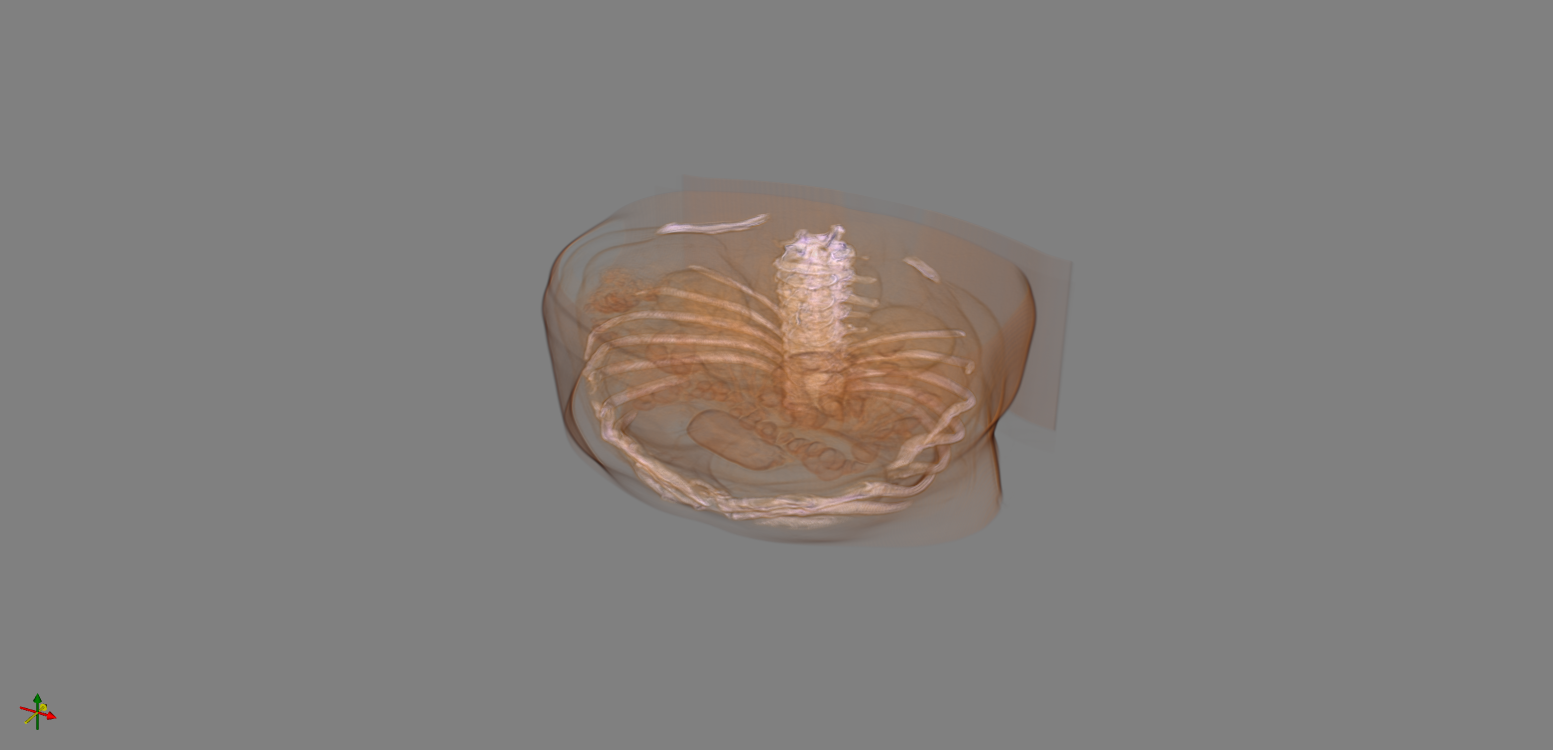
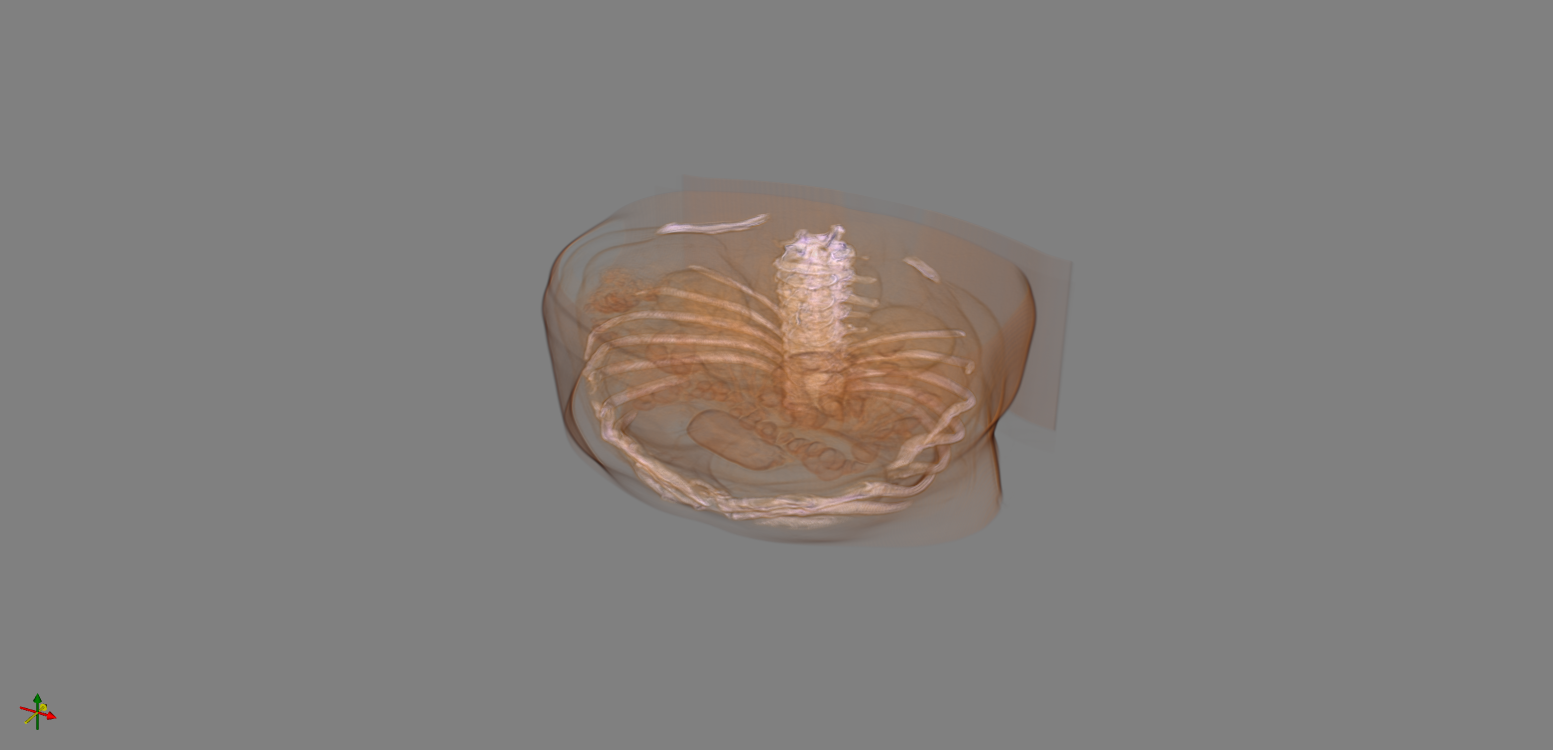

<IPython.core.display.Javascript object>

In [13]:
img = itk.image_view_from_array([ins.pixel_array for ins in instances])
viewer = view(img)

In [14]:
viewer.set_image_gradient_opacity(0.5)